In [ ]:
import pandas as pd
import pandas_datareader.data as pdr

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define time period
start_date = "1996-01-01"
end_date = "2024-12-31"

# Fetch Fama-French ME_Breakpoints data (NYSE percentile breakpoints)
breakpoints_raw = pdr.DataReader(
    name="ME_Breakpoints",
    data_source="famafrench",
    start=start_date,
    end=end_date
)[0]

# Extract percentile labels from column names (e.g., "(0, 5)" -> "5")
def extract_upper_bound(label):
    if isinstance(label, str) and "(" in label:
        try:
            return str(int(label.split(",")[1].replace(")", "").strip()))
        except Exception:
            return label
    elif isinstance(label, tuple):
        return str(label[1])
    return str(label)

# Rename columns to only use upper percentile values
columns_to_rename = {col: extract_upper_bound(col) for col in breakpoints_raw.columns if col != 'Count'}
breakpoints = breakpoints_raw.rename(columns=columns_to_rename)

# Normalize ME values by number of firms (Count) to get "per firm" values
for col in breakpoints.columns:
    if col != 'Count':
        breakpoints[col] = breakpoints[col] / breakpoints['Count']

# Print average firm count over the period
avg_count = int(breakpoints['Count'].mean())
print(f"Average number of NYSE firms from {start_date} to {end_date}: {avg_count}")

Average number of NYSE firms from 1996-01-01 to 2024-12-31: 1386


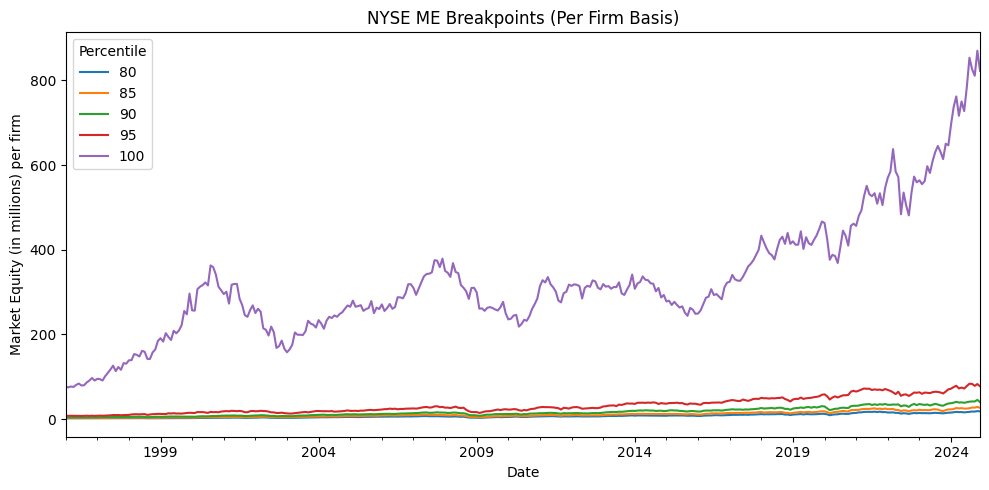

In [ ]:
# Plot selected percentile breakpoints over time
selected_percentiles = ['80', '85', '90', '95', '100']
breakpoints[selected_percentiles].plot(figsize=(10, 5))

plt.legend(title='Percentile')
plt.ylabel('Market Equity (in millions) per firm')
plt.title('NYSE ME Breakpoints (Per Firm Basis)')
plt.tight_layout()
plt.show()

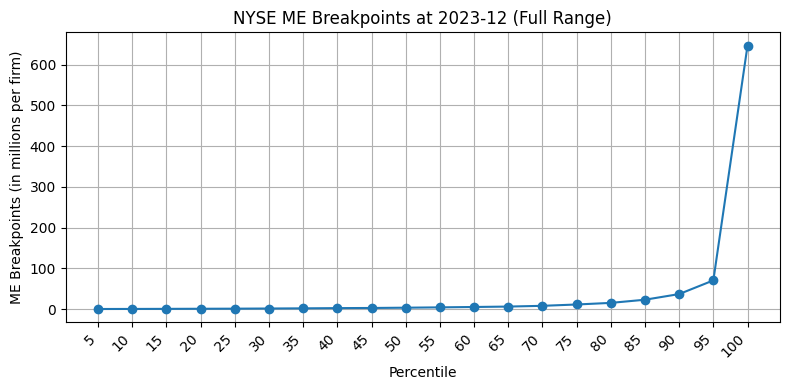

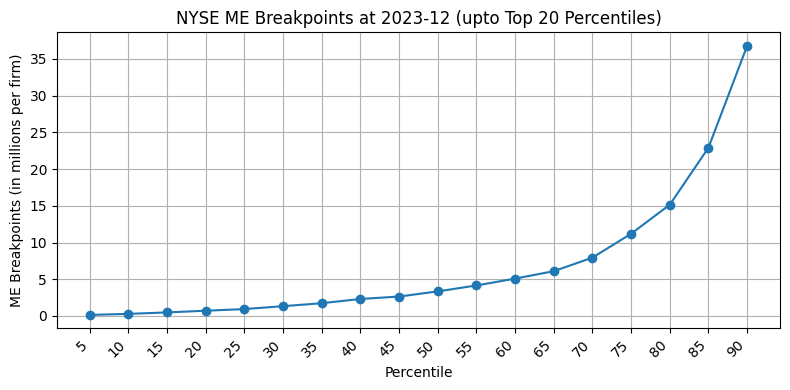

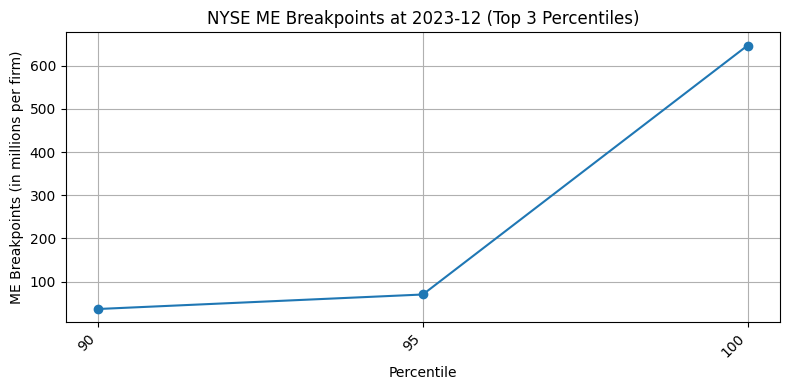

In [ ]:
def plot_breakpoints_at_end(df, count_col='Count', start_pct=0, end_pct=None, title_suffix=''):
    """
    Plot breakpoints at the last available date.
    
    Parameters:
        df: DataFrame with percentile columns and 'Count'
        count_col: name of the column representing number of firms (default: 'Count')
        start_pct: starting index for column slice (e.g., -20 for top 20 percentiles)
        end_pct: ending index for column slice (default: None means till the end)
        title_suffix: string appended to plot title
    """
    # Select data at last date
    last_row = df.tail(1).drop(columns=[count_col])
    
    # Slice desired percentile columns
    selected_columns = last_row.columns[start_pct:end_pct]
    y_data = pd.to_numeric(last_row[selected_columns].values.flatten(), errors='coerce')
    
    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(selected_columns, y_data, marker='o')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Percentile')
    plt.ylabel('ME Breakpoints (in millions per firm)')
    plt.title(f'NYSE ME Breakpoints at {df.index[-1]} {title_suffix}')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# 전체 percentile 구간 시각화
plot_breakpoints_at_end(breakpoints, start_pct=0, title_suffix='(Full Range)')

# 상위 3개 빼고 시각화 (5~90)
plot_breakpoints_at_end(breakpoints, start_pct=-20, end_pct=-2, title_suffix='(upto Top 20 Percentiles)')

# 가장 극단적인 상위 3개만 (90, 95, 100 만)
plot_breakpoints_at_end(breakpoints, start_pct=-3, title_suffix='(Top 3 Percentiles)')


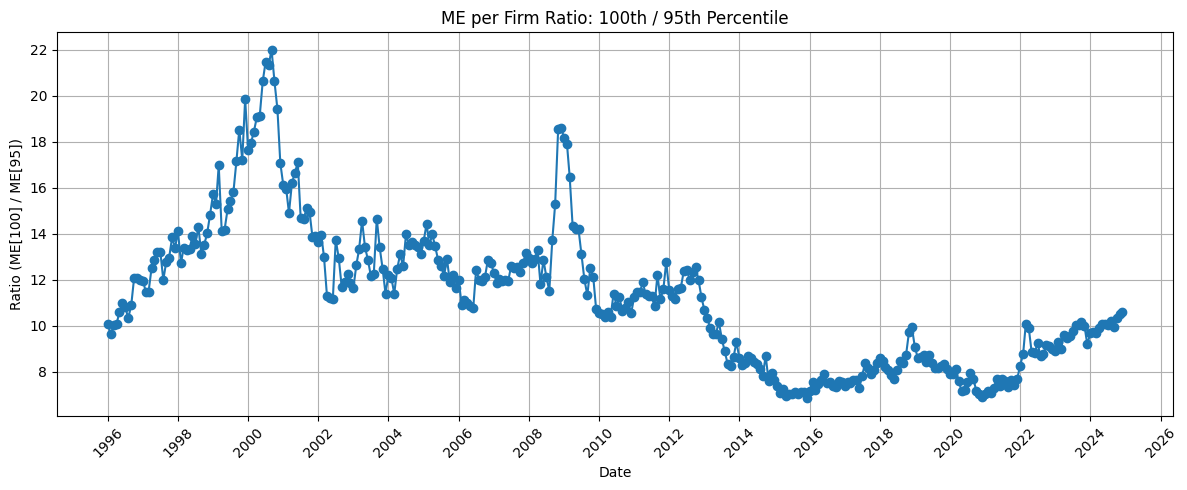

In [41]:
# Calculate the ME per firm ratio: 100th / 95th percentile
ratio_series = breakpoints['100'] / breakpoints['95']

# Convert PeriodIndex to DatetimeIndex for plotting
ratio_series.index = ratio_series.index.to_timestamp()

# Plot both raw and log-transformed ratio
plt.figure(figsize=(12, 5))

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.tick_params(axis='x', rotation=45) # x축 눈금 회전 추가

# Raw ratio
plt.plot(ratio_series.index, ratio_series, marker='o')
plt.title('ME per Firm Ratio: 100th / 95th Percentile')
plt.xlabel('Date')
plt.ylabel('Ratio (ME[100] / ME[95])')
plt.grid(True)

plt.tight_layout()
plt.show()


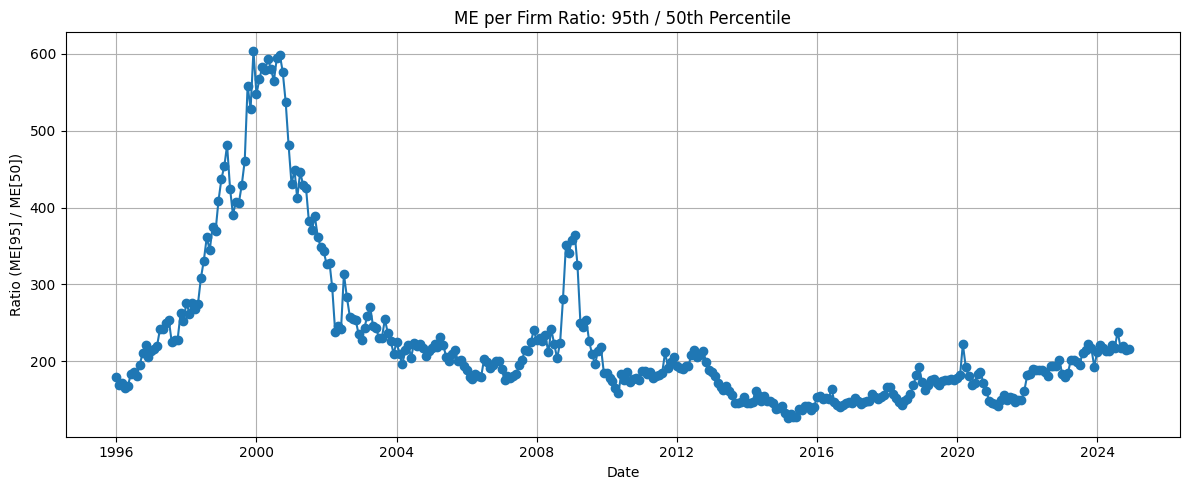

In [ ]:
# Calculate the ME per firm ratio: 95th / 50th percentile
ratio_series = breakpoints['95'] / breakpoints['50']

# Convert PeriodIndex to DatetimeIndex for plotting
ratio_series.index = ratio_series.index.to_timestamp()

# Plot both raw and log-transformed ratio
plt.figure(figsize=(12, 5))

# Raw ratio
plt.plot(ratio_series.index, ratio_series, marker='o')
plt.title('ME per Firm Ratio: 95th / 50th Percentile')
plt.xlabel('Date')
plt.ylabel('Ratio (ME[95] / ME[50])')
plt.grid(True)

plt.tight_layout()
plt.show()
